# $作品五、單變量函數的根與最小值$

### 學號 : 411072054 <br> 姓名 : 黃暐宸

## 作品目標：<br> 
本作品目標在展示如何畫出單變量函數的圖形並標示出關鍵值的位置（最小值、最大值或實數根）。
並模擬了在不同的樣本大小（N）和模擬次數（M）下，使用最大概似估計法（MLE）估計指數分配的參數 λ。程式碼使用指數分配的隨機樣本，然後對每個樣本進行 M 次模擬，計算每次模擬的最大概似估計值和其標準差。


### 作品需要用到的模組

In [30]:
import numpy as np
import scipy.optimize as opt
from scipy import optimize, integrate
from scipy.optimize import fsolve, minimize
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, geom, uniform, beta
import numpy.polynomial.polynomial as poly
import sympy as sym
from sympy import plot

# 習題： 每題都需要畫出目標函數的圖形並標示出關鍵值的位置（最小值、最大值或實數根）。



## 1. $\displaystyle \min_x \sqrt{\frac{x^2+1}{x+1}}$


程式碼解釋
1. 使用np.linspace生成一個包含1000個值的x數組，用於繪製函數圖。
2. 主要使用了opt.minimize_scalar函數來找到函數的最小值。opt是SciPy庫的優化模組。res.x獲取最小值的位置，res.fun獲取相應的函數值。
3. 使用Matplotlib的scatter函數在圖上標記最小值的位置，以紅色圓點表示。
4. 演示如何使用Python進行數學函數的最小值計算和可視化。

C:\Users\wesley\AppData\Local\Temp\ipykernel_15120\374335384.py:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((x**2 + 1) / (x + 1))


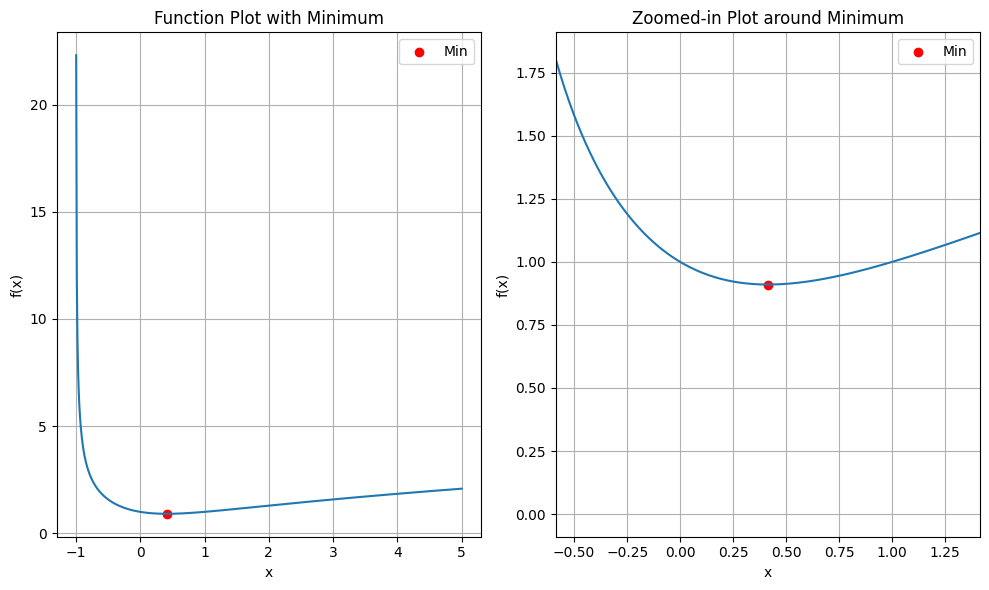

The function has a minimum at x = 0.4142
The corresponding function value is 0.9102


In [31]:

# 定義目標函數
def f(x):
    return np.sqrt((x**2 + 1) / (x + 1))

# 初始猜測的最小值位置
initial_guess = 0.0

# 使用 minimize 函數找到最小值
result = minimize(f, initial_guess)

# 提取最小值位置和對應的函數值
min_x = result.x[0]
min_y = result.fun

# 繪製函數圖
x = np.linspace(-5, 5, 1000)
plt.figure(figsize=(10, 6))

# 主圖
plt.subplot(1, 2, 1)
plt.plot(x, f(x))
plt.scatter(min_x, min_y, color='red', marker='o', label='Min')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function Plot with Minimum')
plt.grid(True)
plt.legend()

# 放大的副圖
plt.subplot(1, 2, 2)
plt.plot(x, f(x))
plt.scatter(min_x, min_y, color='red', marker='o', label='Min')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Zoomed-in Plot around Minimum')
plt.xlim(min_x - 1, min_x + 1)
plt.ylim(min_y - 1, min_y + 1)
plt.grid(True)
plt.legend()

# 顯示圖形
plt.tight_layout()
plt.show()

# 輸出最小值的位置
print('The function has a minimum at x = {:.4f}'.format(min_x))
print('The corresponding function value is {:.4f}'.format(min_y))


結果:<br>
在 x = -1 ~ 0.4142 這個區間，y值急遽下降，隨著x的增加，y值的下降幅度趨緩，直到x=0.4142，函數的值達到最低值0.9102。然後，隨著x的繼續增加，函數的值再次逐漸增加。
因此，可以得出結論，函數f(x)在x=0.4142處有一個最小值。

## 2. $\displaystyle \min_{-4 \leq x \leq 3} (x+1)^5 sin(x-3)$


程式碼解釋
1. 使用NumPy的linspace生成一個包含1000個值的x數組，然後使用Matplotlib的plot函數繪製函數曲線。
2. 使用SciPy的minimize_scalar函數找到函數的最小值。res.x是最小值的位置，res.fun是對應的函數值。
3. 使用Matplotlib的scatter函數在圖上標記最小值的位置，以紅色圓點表示。
4. 使用print語句輸出最小值的位置和相應的函數值，並使用.format方法格式化輸出。
5. 演示了如何使用Python進行數學函數的最小值計算和可視化。

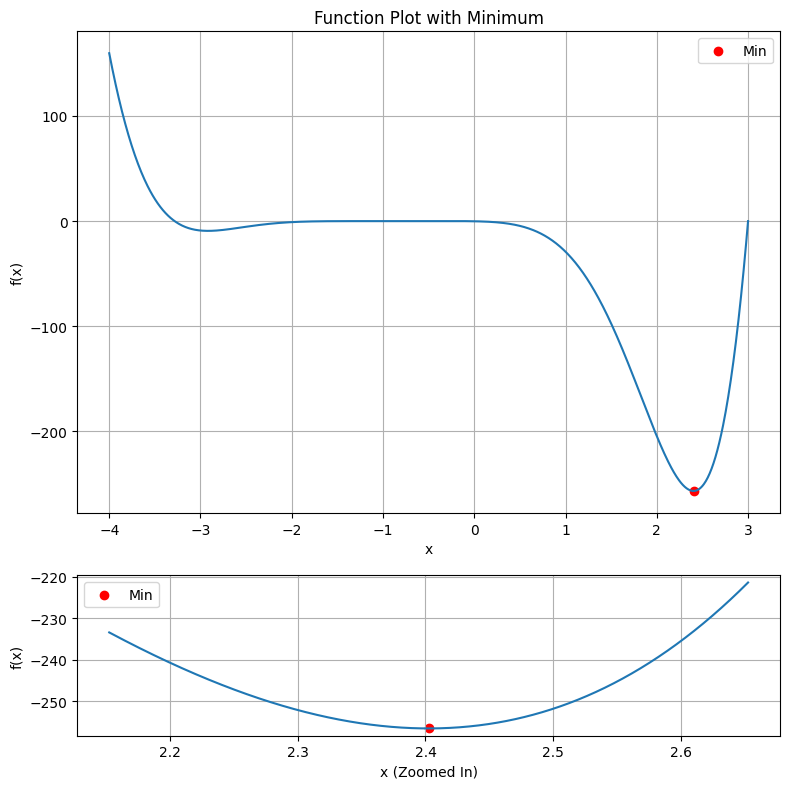

The function has a minimum at x = 2.4025
The corresponding function value is -256.5505


In [30]:

# 定義目標函數
def f(x):
    return (x + 1)**5 * np.sin(x - 3)

# 繪製函數圖
x = np.linspace(-4, 3, 1000)
y = f(x)

# 創建主圖
fig, (ax_main, ax_zoom) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize=(8, 8))
ax_main.plot(x, y)
ax_main.set_xlabel('x')
ax_main.set_ylabel('f(x)')
ax_main.grid(True)

# 計算最小值
res = opt.minimize_scalar(f)
min_x = res.x
min_y = res.fun

# 在主圖上標示最小值
ax_main.scatter(min_x, min_y, color='red', marker='o', label='Min')

# 加上標籤和標題
ax_main.set_title('Function Plot with Minimum')
ax_main.legend()

# 在副圖中顯示最小值附近的區域
zoom_width = 0.5
zoom_x_range = np.linspace(min_x - zoom_width/2, min_x + zoom_width/2, 1000)
zoom_y_range = f(zoom_x_range)

# 創建副圖
ax_zoom.plot(zoom_x_range, zoom_y_range)
ax_zoom.scatter(min_x, min_y, color='red', marker='o', label='Min')

# 加上標籤和標題
ax_zoom.set_xlabel('x (Zoomed In)')
ax_zoom.set_ylabel('f(x)')
ax_zoom.grid(True)
ax_zoom.legend()

plt.tight_layout()
plt.show()

# 輸出最小值的位置
print('The function has a minimum at x = {:.4f}'.format(min_x))
print('The corresponding function value is {:.4f}'.format(min_y))


結果:<br>
當 x = -4 ~ -3時，y值大幅度下降，直到 x = -3 趨緩持平，x = -3 ~ 0.5時，y值持平沒有波動，直到 x = 0.5 ，y值下降幅度增加，持續下降到 x = 2.4025，函數的值達到最低值-256.5505。然後，隨著x的繼續增加，函數的值再次逐漸增加。
因此，可以得出結論，函數f(x)在x=2.4025處有一個最小值。


## 3. 計算 L(x) = 10 的解 x, 其中
### $L(x) = \int_a^x \sqrt{1 + (f'(t))^2}\; dt, \;\; for f(t) = t^2/2$
##  and $a = 0.$


### 迴圈

程式碼解釋
1. 定義了函數f(t)=t^2/2和其導數 f'(t)=t。
2. 使用 integrate.quad 計算 L(X)
3. 使用 optimize.root_scalar 找到 L(x)=10 的解 x。
3. 繪製 L(x) 的圖表，將根的位置標示為紅色點。
1. 圖表上方的綠色虛線表示 L(x)=10。

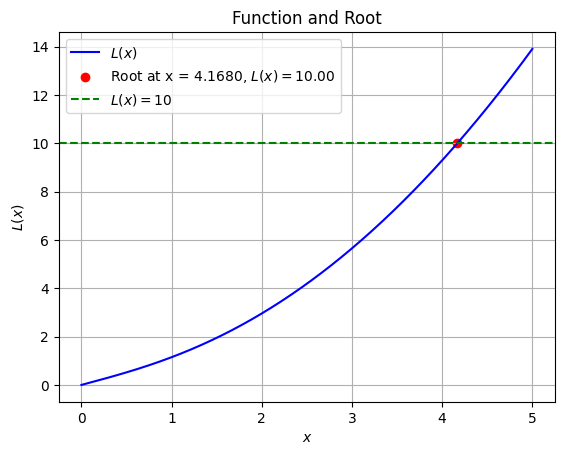

In [23]:

# 定義函數和導數
def f(t):
    return t**2 / 2

def dfdt(t):
    return t

# 定義積分函數
def L(x):
    integrand = lambda t: np.sqrt(1 + dfdt(t)**2)
    result, _ = integrate.quad(integrand, 0, x)
    return result

# 定義根函數
def root_function(x, target_value):
    return L(x) - target_value

# 計算根
target_value = 10
sol = optimize.root_scalar(root_function, bracket=[0, 5], args=(target_value), method='brentq')
root_x = sol.root
target_y = L(root_x)

# 繪製函數圖
x_vals = np.linspace(0, 5, 1000)
y_vals = [L(x) for x in x_vals]

plt.plot(x_vals, y_vals, label='$L(x)$', color='blue')
plt.scatter(root_x, target_y, color='red', label=f'Root at x = {root_x:.4f}, $L(x) = {target_y:.2f}$')

plt.title('Function and Root')
plt.xlabel('$x$')
plt.ylabel('$L(x)$')
plt.axhline(target_value, color='green', linestyle='--', label='$L(x) = 10$')
plt.grid(True)
# 添加圖例
plt.legend()

# 顯示圖形
plt.show()


### broadcasting

程式碼解釋<BR><BR>
使用 NumPy 的 vectorize 函數，這可以對函數進行向量化，積分的部分仍然需要迴圈處理，因為 integrate.quad 不直接支援 broadcasting。

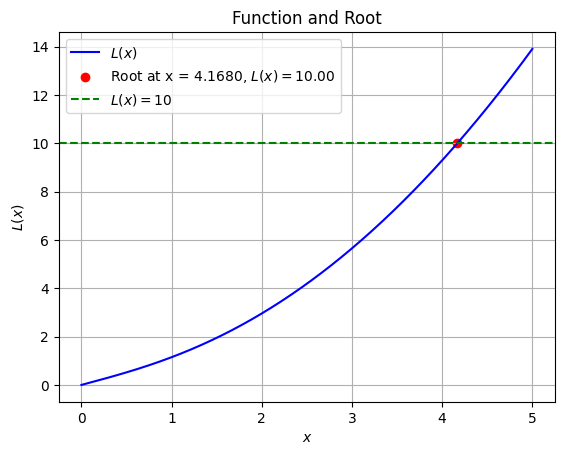

In [25]:

# 定義函數和導數
def f(t):
    return t**2 / 2

def dfdt(t):
    return t

# 定義積分函數
def L(x):
    integrand = lambda t: np.sqrt(1 + dfdt(t)**2)
    result, _ = integrate.quad(integrand, 0, x)
    return result

# 向量化函數
L_vectorized = np.vectorize(L)

# 計算根
target_value = 10
sol = optimize.root_scalar(lambda x: L(x) - target_value, bracket=[0, 5], method='brentq')
root_x = sol.root
target_y = L(root_x)

# 使用 broadcasting 計算整個陣列的 L(x)
x_vals = np.linspace(0, 5, 1000)
y_vals = L_vectorized(x_vals)

# 繪製函數圖
plt.plot(x_vals, y_vals, label='$L(x)$', color='blue')
plt.scatter(root_x, target_y, color='red', label=f'Root at x = {root_x:.4f}, $L(x) = {target_y:.2f}$')

plt.title('Function and Root')
plt.xlabel('$x$')
plt.ylabel('$L(x)$')
plt.axhline(target_value, color='green', linestyle='--', label='$L(x) = 10$')
plt.grid(True)
# 添加圖例
plt.legend()

# 顯示圖形
plt.show()


結果:<br>當L(X) = 10，根在x = 4.1680


## 4. 最大概似函數估計（MLE）（離散分配）：計算 $\displaystyle \max_{p} \ln \Pi_{i=1}^N f(x_i; p)$ ,


### (1)任取一組樣本，繪製目標函數 $\displaystyle \ln \Pi_{i=1}^N f(x_i; p)$，並標示出最大值的位置。

程式碼解釋
1. 生成樣本數據： 使用幾何分佈生成樣本數據，設定成功的機率 p 為 0.2，總共生成 30 個樣本。
2. 定義對數概似函數和概似函數： 定義幾何分佈的對數概似函數和概似函數。
3. 定義目標函數： 定義目標函數為對數概似函數的相反數，因為 minimize 函數找的是最小值。
4. 最大概似估計： 使用 scipy.optimize.minimize 函數找到最大概似估計值，起始點為 p=0.5，並限制 p 的範圍在 [0, 1]。
5. 繪製目標函數圖形： 繪製對數概似函數在 p 範圍內的圖形，並標記出最大概似估計的位置。

C:\Users\wesley\AppData\Local\Temp\ipykernel_15120\1903966237.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum((x - 1) * np.log(1 - p) + np.log(p))


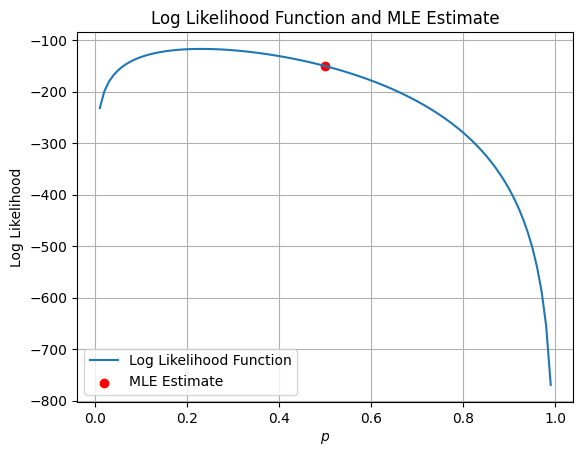

估計的 p 值為 0.5000
對數概似函數的最大值為 -150.4129


In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# 定義幾何分佈的對數概似函數
def log_likelihood(p, x):
    return np.sum((x - 1) * np.log(1 - p) + np.log(p))

# 定義幾何分佈的概似函數
def geometric_pmf(p, x):
    return (1 - p) ** (x - 1) * p

# 生成幾何分佈樣本數據（p=0.2）
np.random.seed(42)
samples = np.random.geometric(0.2, size=50)

# 計算目標函數的值
def objective_function(p):
    return -log_likelihood(p, samples)

# 使用 minimize 函數找到最大概似估計
result = minimize(objective_function, x0=0.5, bounds=[(0, 1)])

# 繪製目標函數圖形
p_values = np.linspace(0.01, 0.99, 100)
likelihood_values = [log_likelihood(p, samples) for p in p_values]

plt.plot(p_values, likelihood_values, label='Log Likelihood Function')
plt.scatter(result.x, -result.fun, color='red', label='MLE Estimate')

plt.title('Log Likelihood Function and MLE Estimate')
plt.xlabel('$p$')
plt.ylabel('Log Likelihood')
plt.legend()
plt.grid(True)
plt.show()
print('估計的 p 值為 {:.4f}'.format(result.x[0]))
print('對數概似函數的最大值為 {:.4f}'.format(-result.fun))

### (2)畫一張折線圖，呈現每組樣本數的 p 估計值。為得到在每一組樣本數下較穩定的估計值，對每組樣本數皆執行 10,000 次，最後取其平均數作為估計值。

程式碼解釋
1. 目的是進行模擬實驗，評估在不同的樣本大小（Sample size，N）和不同的試驗次數（M）下，使用最大概似估計法（Maximum Likelihood Estimation, MLE）估計幾何分布參數 p 的性能。
2. M_values: 用來指定不同的模擬試驗次數（M）的數值。在這個例子中，有三個不同的 M，分別為 10、100、1000。
3. true_p: 真實的幾何分布參數 p 的值，設定為 0.2。
4. N: 用來指定不同的樣本大小（Sample size，N）的數值。在這個例子中，有七個不同的 N，分別為 10、20、30、50、100、300、500。
5. fig, axes = plt.subplots(2, 3, figsize=(15, 10)): 創建一個 2x3 的 subplot 畫板，用來展示估計結果的折線圖。
6. 主要的迴圈部分：
在每次試驗中，利用最大概似法估計幾何分布參數 p。這是通過生成幾何分布的隨機樣本，然後使用 opt.minimize_scalar 函數最小化概似函數的方式實現的。
將 M 次試驗的估計結果存儲在 Est_p_values 陣列中。
計算每個 N 對應的平均估計值和標準差，並存儲在 Est_p_mean_values 和 Est_p_std_values 陣列中。
7. 繪製兩個子圖：<br>
第一個子圖 (ax1): 顯示 MLE 估計的 p 的平均值隨著樣本大小的變化。<br>
第二個子圖 (ax2): 顯示 MLE 估計的 p 的標準差隨著樣本大小的變化。

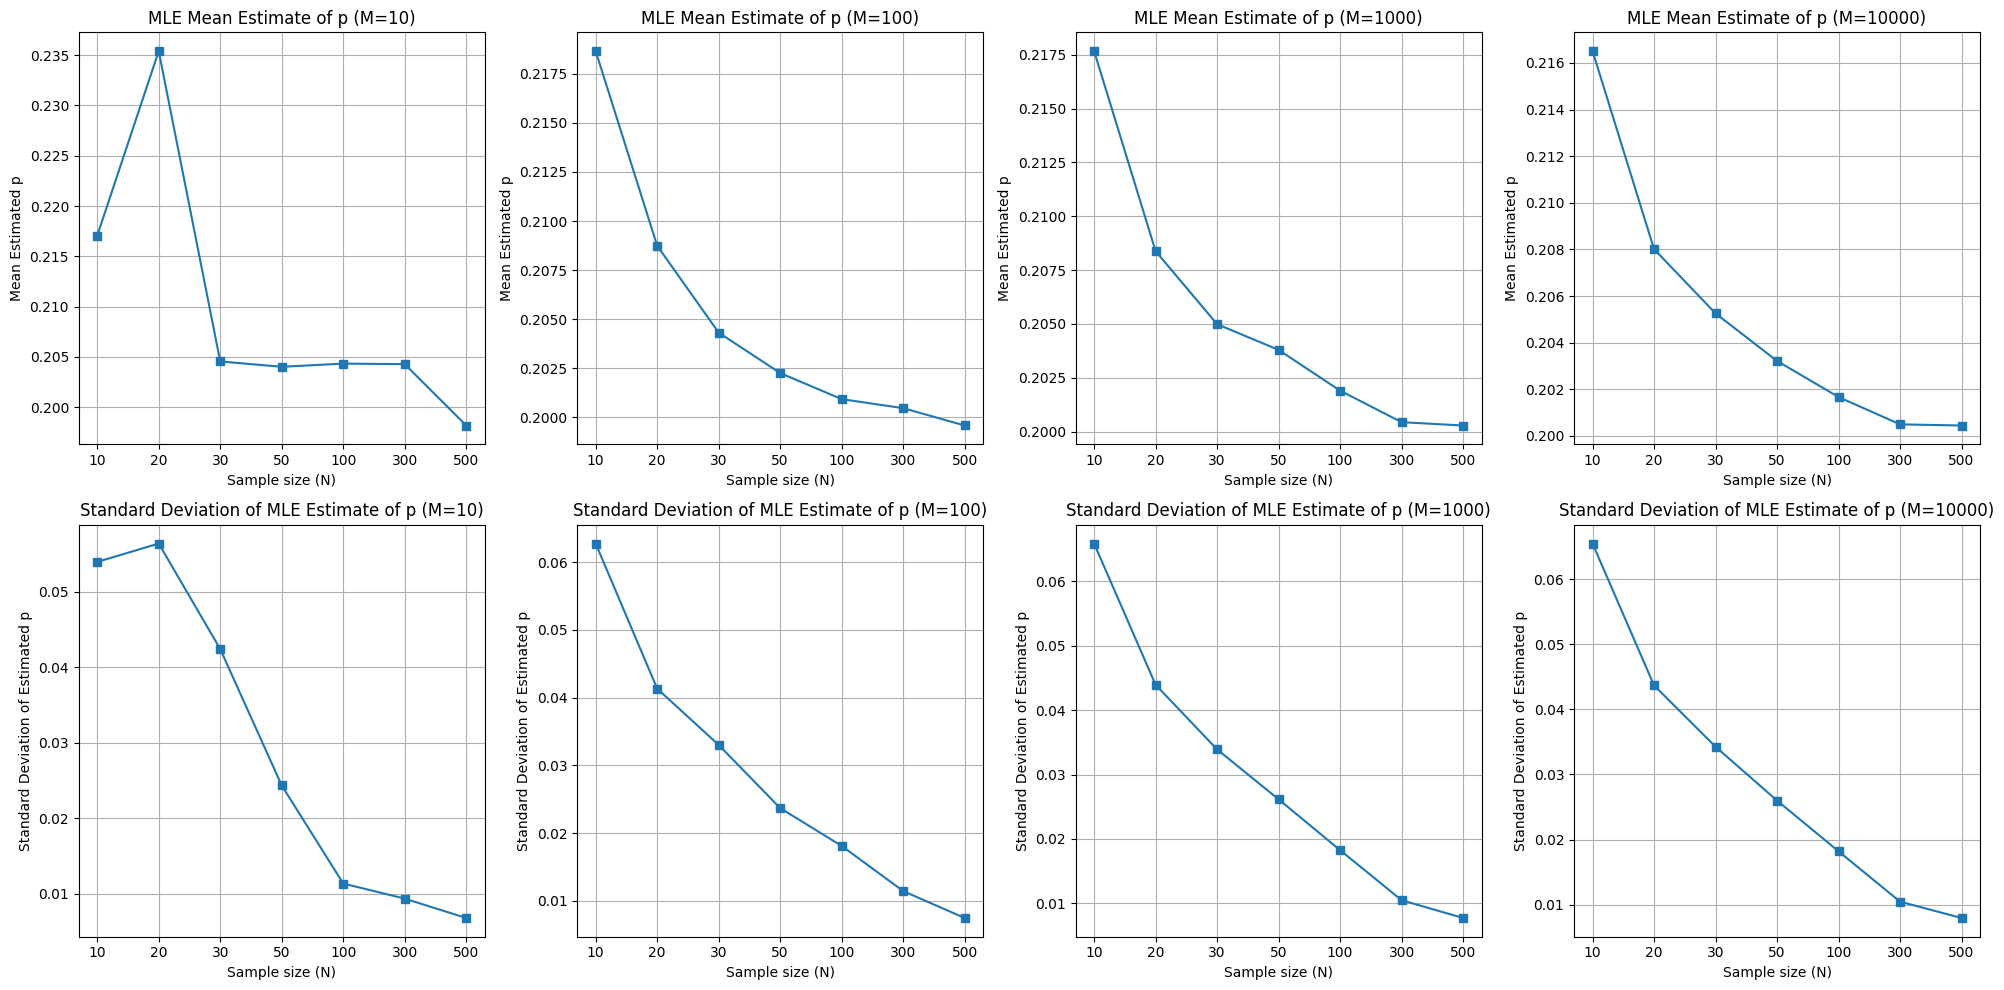

In [7]:

# 修改 M 的數值
M_values = [10, 100, 1000, 10000]  # 分別為 M1=10, M2=100, M3=1000, M4=10000
true_p = 0.2
N = [10, 20, 30, 50, 100, 300, 500]

fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # Adjusted for the additional value of M=10000

for i, M in enumerate(M_values):
    Est_p_mean_values = np.zeros(len(N))
    Est_p_std_values = np.zeros(len(N))

    for j, sample_size in enumerate(N):
        Est_p_values = np.zeros((M, sample_size))
        for k in range(M):
            # 使用最大概似函數估計
            data = geom.rvs(p=true_p, size=sample_size)
            f = lambda p: -np.sum(np.log(geom.pmf(data, p)))
            res = opt.minimize_scalar(f, bounds=[0, 1], method='bounded')
            Est_p_values[k, :] = res.x

        Est_p_mean_values[j] = np.mean(Est_p_values)
        Est_p_std_values[j] = np.std(Est_p_values)

    # 繪製 p 估計值的折線圖
    ax1 = axes[0, i]
    ax1.plot(np.linspace(0, len(N) - 1, len(N)), Est_p_mean_values, marker='s')
    ax1.set_xticks(np.arange(len(N)))
    ax1.set_xticklabels(N)
    ax1.grid(True)
    ax1.set_xlabel('Sample size (N)')
    ax1.set_ylabel('Mean Estimated p')
    ax1.set_title(f'MLE Mean Estimate of p (M={M})')

    # 繪製標準差的折線圖
    ax2 = axes[1, i]
    ax2.plot(np.linspace(0, len(N) - 1, len(N)), Est_p_std_values, marker='s')
    ax2.set_xticks(np.arange(len(N)))
    ax2.set_xticklabels(N)
    ax2.grid(True)
    ax2.set_xlabel('Sample size (N)')
    ax2.set_ylabel('Standard Deviation of Estimated p')
    ax2.set_title(f'Standard Deviation of MLE Estimate of p (M={M})')

plt.tight_layout()
plt.show()


結果:<br>
1. 上面的四個圖 (MLE Mean Estimate of p): <br>(1)真實的幾合分布P值是0.2，在M=10時，估計 p 的最大概似均值十分不穩定，照理來說樣本數越大，估計 p 的最大概似均值會越接近真實P值，但樣本數等於10時，Estimate of p =0.215，樣本數等於20時，Estimate of p =0.235，十分不穩定。<BR>(2)在M=100,1000,10000時，隨著樣本數越大，估計 p 的最大概似均值會越接近真實P值，其中的差異是模擬次數越多，Estimate of p越穩定也越準。

2. 下面的四個圖 (Standard Deviation of MLE Estimate of p): <br>
(1)在M=10時，估計 p 的最大概似均值的標準差十分不穩定，照理來說樣本數越大，標準差也越小，但樣本數等於10時，標準差約等於0.054，樣本數等於20時，標準差約等於0.056，反而變大了，十分不穩定。<BR>(2)在M=100,1000,10000時，隨著樣本數越大，標準差也會越小，沒有特別明顯的差異。

3. 結論 : 總結就是，隨著樣本數越大，估計 p 的最大概似均值會越接近真實P值，標準差也會越小，且模擬次數越多會讓估計 p 的最大概似均值與其標準差表現得越穩定。

### 不取對數的方式


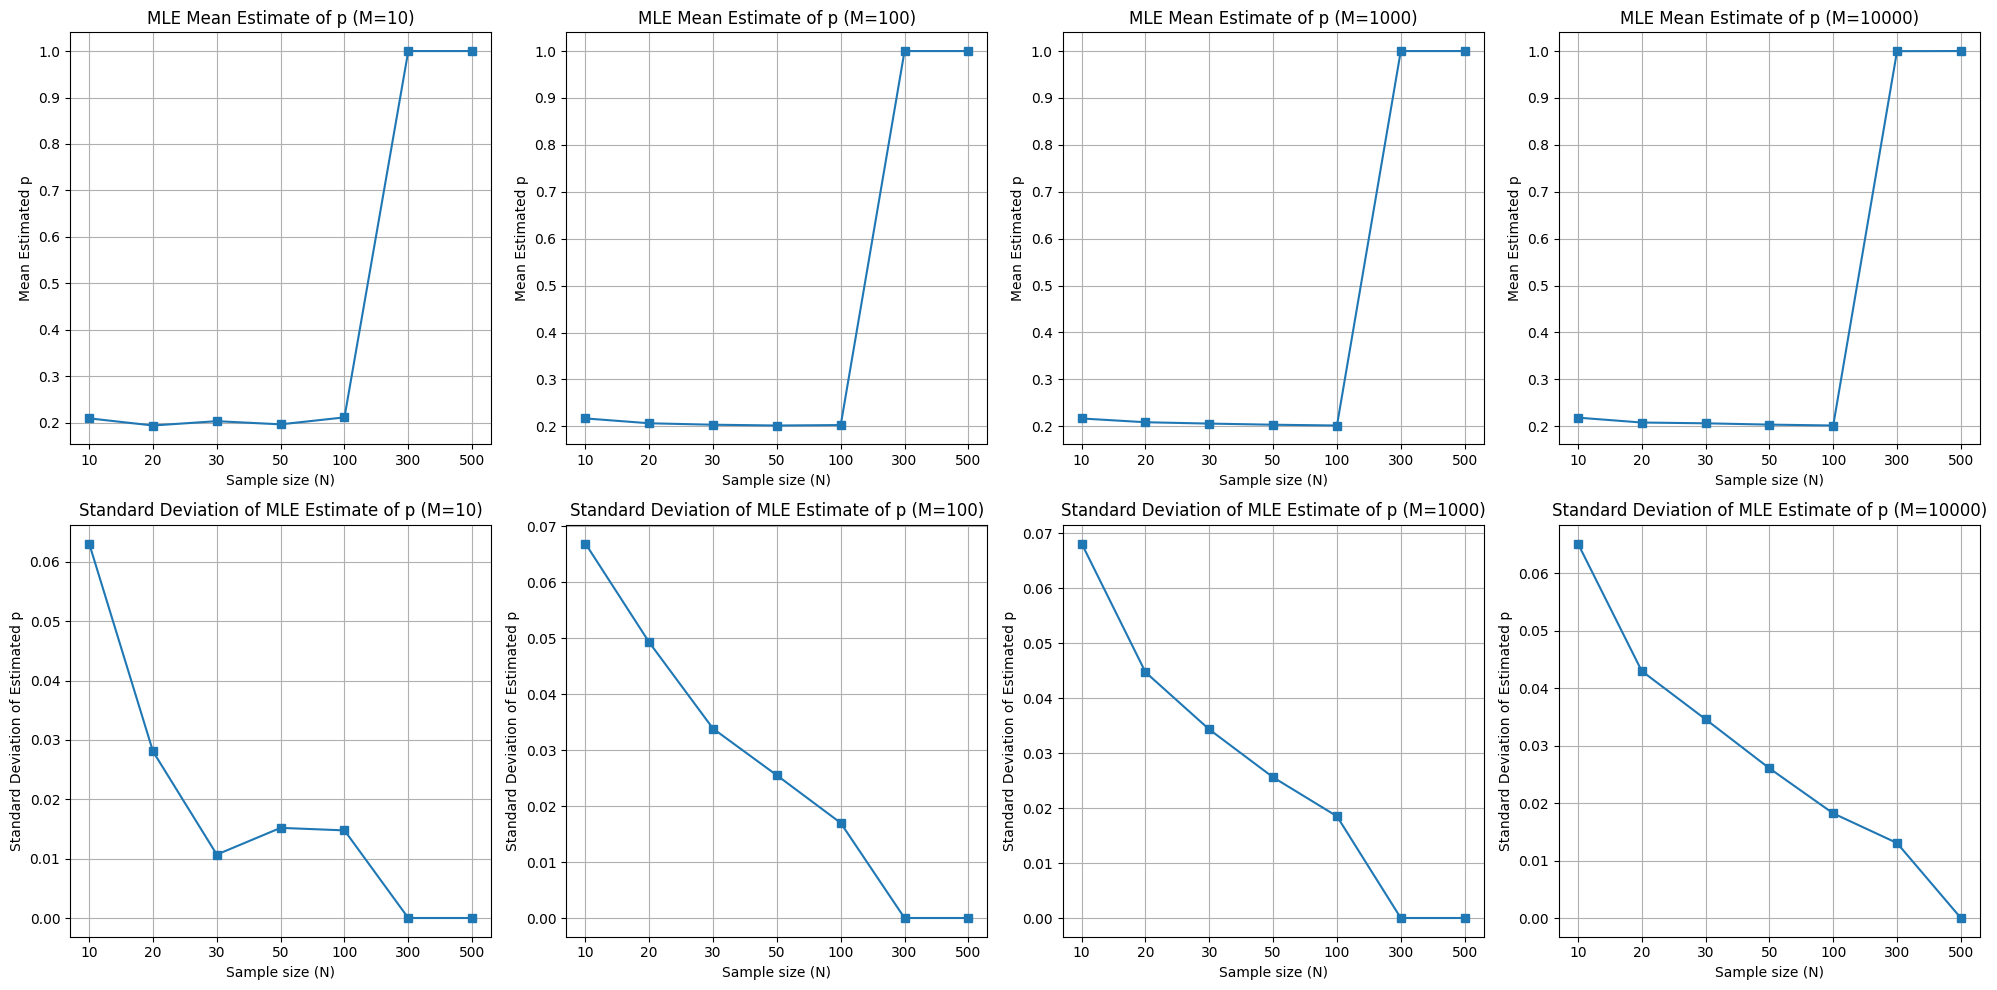

In [11]:

# 修改 M 的數值
M_values = [10, 100, 1000, 10000]  # 分別為 M1=10, M2=100, M3=1000, M4=10000
true_p = 0.2
N = [10, 20, 30, 50, 100, 300, 500]

fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # 調整為4列，以容納M=10000

for i, M in enumerate(M_values):
    Est_p_mean_values = np.zeros(len(N))
    Est_p_std_values = np.zeros(len(N))

    for j, sample_size in enumerate(N):
        Est_p_values = np.zeros((M, sample_size))
        for k in range(M):
            # 使用最大概似函數估計
            data = geom.rvs(p=true_p, size=sample_size)
            f = lambda p: -np.prod(geom.pmf(data, p))
            res = opt.minimize_scalar(f, bounds=[0, 1], method='bounded')
            Est_p_values[k, :] = res.x

        Est_p_mean_values[j] = np.mean(Est_p_values)
        Est_p_std_values[j] = np.std(Est_p_values)

    # 繪製 p 估計值的折線圖
    ax1 = axes[0, i]
    ax1.plot(np.linspace(0, len(N) - 1, len(N)), Est_p_mean_values, marker='s')
    ax1.set_xticks(np.arange(len(N)))
    ax1.set_xticklabels(N)
    ax1.grid(True)
    ax1.set_xlabel('Sample size (N)')
    ax1.set_ylabel('Mean Estimated p')
    ax1.set_title(f'MLE Mean Estimate of p (M={M})')

    # 繪製標準差的折線圖
    ax2 = axes[1, i]
    ax2.plot(np.linspace(0, len(N) - 1, len(N)), Est_p_std_values, marker='s')
    ax2.set_xticks(np.arange(len(N)))
    ax2.set_xticklabels(N)
    ax2.grid(True)
    ax2.set_xlabel('Sample size (N)')
    ax2.set_ylabel('Standard Deviation of Estimated p')
    ax2.set_title(f'Standard Deviation of MLE Estimate of p (M={M})')

plt.tight_layout()
plt.show()


結果:<br>
當使用概率的乘積計算時，直接使用概率的乘積可能在數值上變得非常小，尤其是當樣本數變大時。這可能導致在優化過程中的數值不穩定性。所以才會出現 N = 300時Estimate of p 跳到1，與原本設定的真實P=0.2差很多的狀況。<br>但標準差就表現得很正常，隨著模擬次數越多標準差越穩定，隨著樣本越大標準差也越小

## 5 .最大概似函數估計（MLE）（連續型分配）：計算 $\displaystyle \max_{\lambda} \ln \Pi_{i=1}^N f(x_i; \lambda)$


### (1)任取一組樣本，繪製目標函數 $\displaystyle \ln \Pi_{i=1}^N f(x_i; \lambda)$，並標示出最大值的位置。

程式碼解釋
1. 生成樣本數據： 使用指數分佈生成樣本數據，設定真實的 λ 為 2，樣本數量為 30。
2. 定義概似函數和對數概似函數： 定義指數分佈的概似函數和對數概似函數。
3. 最大概似估計： 使用 scipy.optimize.minimize 函數找到最大概似估計值。這裡使用了 L-BFGS-B 方法，起始點為 λ=1。
4. 繪製目標函數圖形： 繪製對數概似函數在 λ 範圍內的圖形，並標記出最大概似估計的位置。

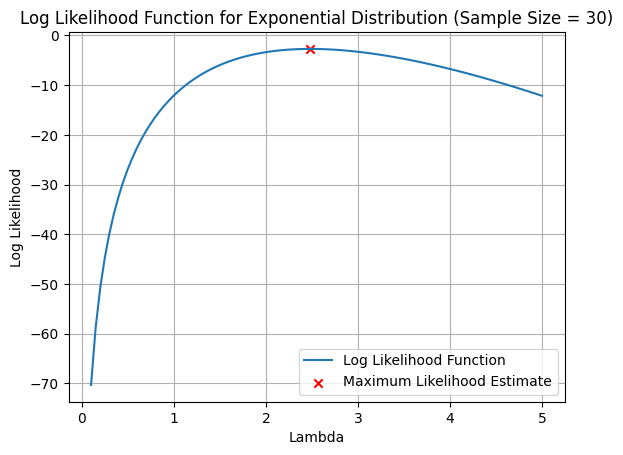

估計的 λ = 2.4820
對數概似函數的最大值 = -2.7280


In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# 定義指數分配的概似函數和對數概似函數
def likelihood_function(lambda_, x):
    return lambda_ * np.exp(-lambda_ * x)

def log_likelihood(lambda_, x):
    return np.sum(np.log(likelihood_function(lambda_, x)))

# 任取一組樣本
np.random.seed(42)  # 設定種子以確保結果可重複
true_lambda = 2
sample_size = 30
sample_data = np.random.exponential(scale=1/true_lambda, size=sample_size)

# 最大概似估計
result = minimize(lambda lambda_: -log_likelihood(lambda_, sample_data), x0=1, method='L-BFGS-B')
estimated_lambda = result.x[0]

# 繪製目標函數的圖形
lambda_range = np.linspace(0.1, 5, 100)
log_likelihood_values = [log_likelihood(l, sample_data) for l in lambda_range]

plt.plot(lambda_range, log_likelihood_values, label='Log Likelihood Function')
plt.scatter(estimated_lambda, log_likelihood(estimated_lambda, sample_data), marker='x', color='red', label='Maximum Likelihood Estimate')
plt.xlabel('Lambda')
plt.ylabel('Log Likelihood')
plt.title('Log Likelihood Function for Exponential Distribution (Sample Size = 30)')
plt.grid(True)
plt.legend()
plt.show()
print('估計的 λ = {:.4f}'.format(estimated_lambda))
print('對數概似函數的最大值 = {:.4f}'.format(log_likelihood(estimated_lambda, sample_data)))

### (2)畫一張折線圖，呈現每個樣本數的 $\lambda$ 估計值。為得到在每一個樣本數下較穩定的估計值，對每個樣本數皆執行 10,000 次，最後取其平均數作為估計值。

程式碼解釋
1. 設定參數： 給定真實的指數分佈參數 λ=2，以及不同的樣本大小 N 和模擬次數 M。
2. 模擬估計： 使用迴圈遍歷不同的樣本大小和模擬次數，每次模擬生成 M 個大小為 N 的樣本，然後對每個樣本使用最大概似估計法（MLE）估計參數 
λ。
3. 計算統計量： 對於每一組樣本大小 N，計算估計值的平均數和標準差，以瞭解估計值的中心趨勢和變異性。
4. 繪圖呈現： 使用 Matplotlib 在子圖中繪製平均估計值和標準差，分別觀察其隨樣本大小和模擬次數的變化。
5. 呈現多個情境： 繪製了多個子圖，每個子圖對應不同的模擬次數 M，以比較在不同模擬次數下估計值的穩定性。


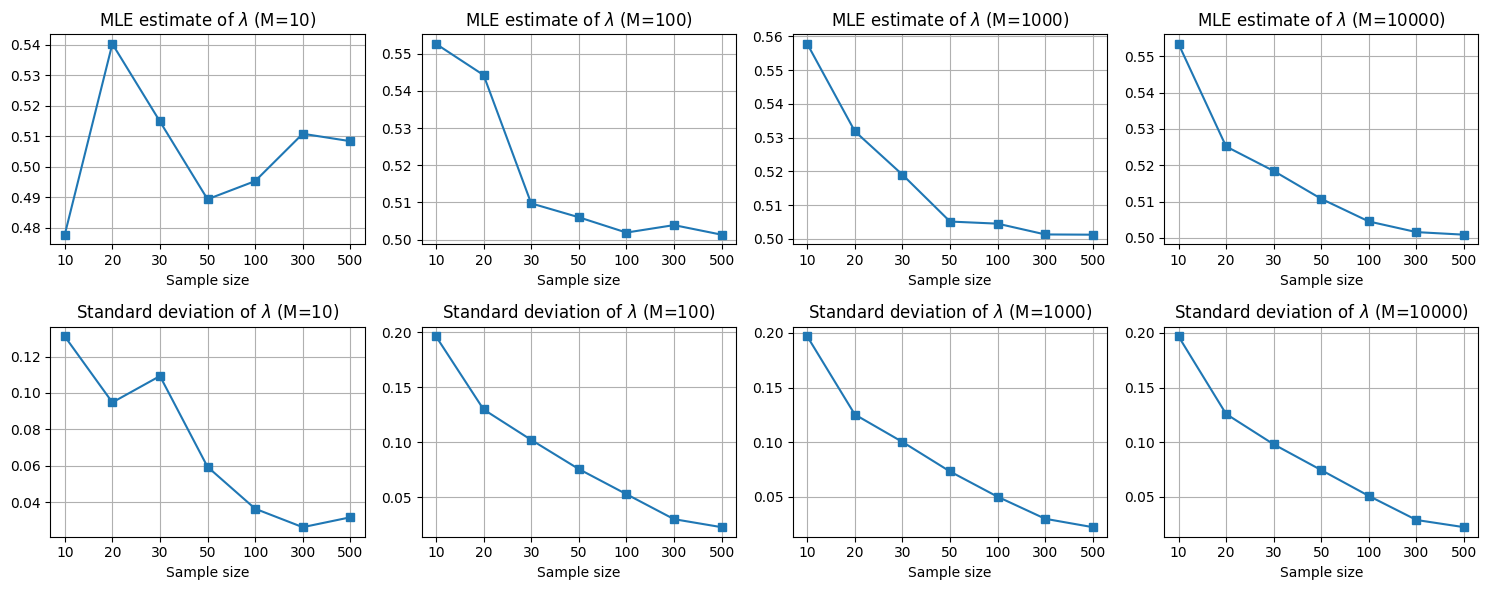

In [50]:

# 修改 M 的數值
M_values = [10, 100, 1000, 10000]
true_l = 0.5
N = [10, 20, 30, 50, 100, 300, 500]

fig, axes = plt.subplots(2, 4, figsize=(15, 6))

for idx, M in enumerate(M_values):
    Mu = np.zeros(len(N))
    Std = np.zeros(len(N))
    for j in range(len(N)):
        S = expon.rvs(scale=1/true_l, size=(M, N[j]))
        R = np.zeros(M)
        for i in range(M):
            f = lambda l: -(N[j] * np.log(l) - l * np.sum(S[i, :]))
            res = opt.minimize_scalar(f, bounds=[0.1, 5], method='bounded')
            R[i] = res.x

        Mu[j], Std[j] = np.mean(R), np.std(R)

    ax1 = axes[0, idx]
    ax1.plot(Mu, marker='s')
    ax1.set_xticks(np.arange(len(N)))
    ax1.set_xticklabels(N)
    ax1.grid(True)
    ax1.set_xlabel('Sample size')
    ax1.set_title(f'MLE estimate of $\lambda$ (M={M})')

    ax2 = axes[1, idx]
    ax2.plot(Std, marker='s')
    ax2.set_xticks(np.arange(len(N)))
    ax2.set_xticklabels(N)
    ax2.grid(True)
    ax2.set_xlabel('Sample size')
    ax2.set_title(f'Standard deviation of $\lambda$ (M={M})')

plt.tight_layout()
plt.show()


結果:<br>
1. 上面的四個圖 (MLE Mean Estimate of λ): <br>(1)真實的指數分佈參數 λ=0.5，在M=10時，估計值十分不穩定，照理來說樣本數越大，估計 λ 的最大概似均值會越接近真實λ值，但樣本數等於10時，Estimate of λ =0.48，樣本數等於20時，Estimate of λ =0.54，樣本數等於30時，Estimate of λ 又跳到0.515，十分不穩定。<BR>(2)在M=100,1000,10000時，隨著樣本數越大，估計 λ 的最大概似均值會越接近真實λ值，其中的差異是模擬次數越多，Estimate of λ越穩定也越準。

2. 下面的四個圖 (Standard Deviation of MLE Estimate of λ): <br>
(1)在M=10時，估計 λ 的最大概似均值的標準差十分不穩定，照理來說樣本數越大，標準差也越小，但樣本數等於20時，標準差約等於0.138，樣本數等於30時，標準差約等於0.096，反而變大了，十分不穩定。<BR>(2)在M=100,1000,10000時，隨著樣本數越大，標準差也會越小，沒有特別明顯的差異。

3. 結論 : 總結就是，隨著樣本數越大，估計 λ 的最大概似均值會越接近真實λ值，標準差也會越小，且模擬次數越多會讓估計 λ 的最大概似均值與其標準差表現得越穩定。

# 範例與練習

## 範例 1：以數值方法計算多項式函數的根

## 繪製函數圖形並標示所有根的位置。

程式碼解釋：　<BR>
演示了如何找到多項式函數的根（解）。其中，poly.polyroots 函數用於計算多項式的根，並使用 poly.polyval 計算多項式的值。
1. coef: 多項式的係數，由低次到高次排列。
2. poly.polyroots(coef): 計算多項式的根。
3. np.real(r[np.isreal(r)]): 提取實數根。
4. 圖表: 以綠色線表示多項式，紅點表示實數根。

## Solve $f(x) = x^2-3x+2=0$ for $x$

The roots are [1. 2.]


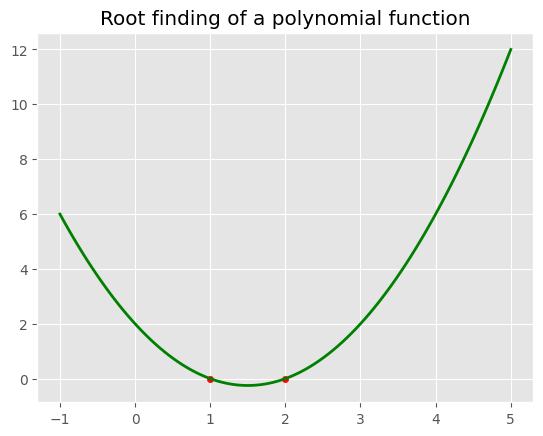

In [27]:
 
coef = [2, -3, 1] # from low to high
r = poly.polyroots(coef)
print('The roots are {}'.format(r))

coef = [2, -3, 1]
r = poly.polyroots(coef) # roots
r_x =np.real(r[np.isreal(r)])  # real part of the root
x = np.linspace(-1, 5, 100) # x-axis
y = poly.polyval(x, coef) # y-axis

plt.style.use('ggplot')
plt.plot(x, y, color = 'g', linewidth = 2)
plt.scatter(r_x, [0, 0], s = 20, c = 'r')
plt.grid(True)
plt.title('Root finding of a polynomial function')
plt.show()

結果：　<BR>當 x 等於 1 或 2 時，這個多項式的值會等於零。

## Solve $f(x) = x^4-8x^3+16x^2-2x+8=0$ for $x$

The roots are [-0.05897114-0.69440757j -0.05897114+0.69440757j  4.        +0.j
  4.11794227+0.j        ]


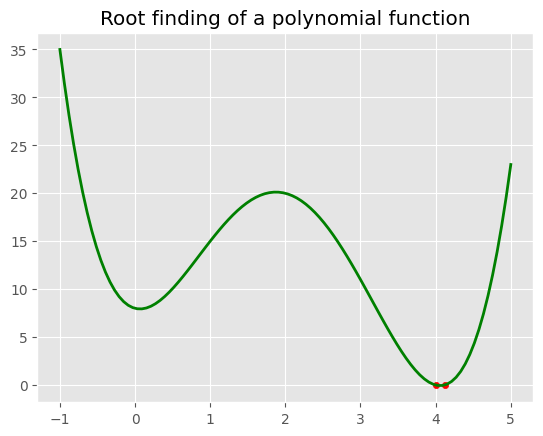

In [28]:
coef = [8, -2, 16, -8, 1] # from low to high
r = poly.polyroots(coef)
print('The roots are {}'.format(r))

coef = [8, -2, 16, -8, 1]
r = poly.polyroots(coef) # roots
r_x =np.real(r[np.isreal(r)])  # real part of the root
x = np.linspace(-1, 5, 100) # x-axis
y = poly.polyval(x, coef) # y-axis
 
plt.style.use('ggplot')
plt.plot(x, y, color = 'g', linewidth = 2)
plt.scatter(r_x, [0, 0], s = 20, c = 'r')
plt.grid(True)
plt.title('Root finding of a polynomial function')
plt.show() 

結果：　<BR>圖顯示當 x 約等於4 ,4.12時，這個多項式的值會等於零。
但程式多解出 -0.05897114-0.69440757j , -0.05897114+0.69440757j，這兩個錯誤的根，代表程式碼還需要優化。

## 範例 2：以數值方法計算一般函數（非多項式函數）的根

## Solve $f(x) = x - e^{-x/2} = 0$ for $x$。

## 繪製函數圖形並標示所有根的位置。

程式碼解釋：　<BR>
演示了如何使用SciPy的root_scalar函數找到方程式的根，同時畫出函數圖。函數 f(x) 表示為 x - np.exp(-x/2)，使用 opt.root_scalar 在指定的區間 [0.5, 1] 內尋找方程式的根。
1. sol = opt.root_scalar(f, bracket=[0.5, 1], method='brentq'): 使用 Brent 演算法找到方程式的根。
2. plt.text(sol.root, 0, 'X', color='r', ...): 在找到的根的位置標註紅色的 "X"。

The root is at x = 0.7035


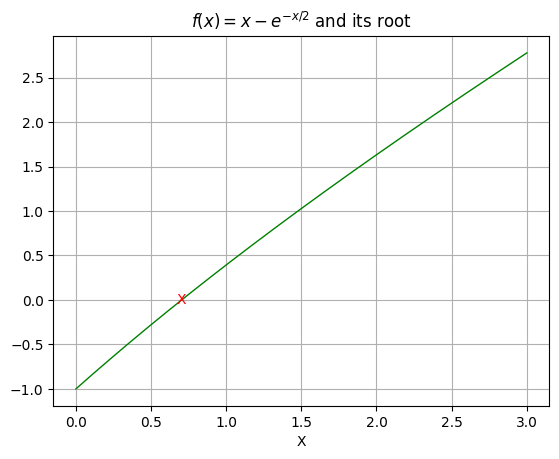

In [1]:


def f(x) : #函數比較複雜時不能用lambda一行解決 一定要用def
    fun = x - np.exp(-x/2)
    return fun 
# f = lambda x: x - np.exp(-x/2) #函數比較簡單時可以用lambda

# ---- First, draw the graph ------
x = np.linspace(0, 3, 1000)
plt.plot(x, f(x), color = 'g', linewidth = 1)
# ---- Second, compute the root ------
sol = opt.root_scalar(f, bracket=[0.5, 1], method='brentq') #給函數和區間就能找到根(只能找到一個根) 
#method='brentq' brentq是一種演算法，還有其他演算法，像是bisect brentq newton等等
#brentq的概念是先找到一個包含根的區間，然後再縮小區間，直到找到根，透過正負號判斷根的位置
print('The root is at x = {:.4f}'.format(sol.root))  
# mark the root on top of function line
plt.text(sol.root, 0, 'X', color = 'r',
    horizontalalignment='center',
    verticalalignment='center')  
plt.title('$f(x) = x - e^{-x/2}$ and its root')
plt.xlabel('X'), plt.grid(True)
plt.show()

結果：　<BR> 當x=0.7035時，這個多項式的值會等於零，結果正確。

## 另一個計算一般函數根的指令 sicpy.optimize.root。

In [ ]:

f = lambda x : x - np.exp(-x/2)
sol = opt.root(f, x0 = 1) 
# print(dir(sol))
print('The root is x = {:.4f}'.format(sol.x[0]))
print('The function value is f = {:.6f}'.format(sol.fun[0]))

The root is x = 0.7035
The function value is f = 0.000000


注意事項與討論:<br>
1. 解根的方法是演算法 (猜答案 -> 逐步往目標前進 -> 一直檢查是否到達目的地)

## 練習：計算一般多根函數的根

## 分別以指令 sicpy.optimize.root 與 sicpy.optimize.root_scalar 計算函數 <BR> $f(x) = x^4-8x^3+16x^2-2x+8=0$ <BR>的兩個根。(兩種方式各做一次)

程式碼解釋：　<BR>這段程式碼使用了 scipy.optimize.root 函數和 scipy.optimize.root_scalar 函數來計算多項式函數的根。
1. 使用 scipy.optimize.root 函數，透過指定的初始猜測值範圍 [3.0,5.0]，計算多項式的根，並將結果存儲在 result_root 中。
2. 使用 scipy.optimize.root_scalar 函數，通過生成均勻分布的隨機數作為初始值 x0，進行多次根的計算。然後，過濾掉不滿足 ∣f(roots)∣<1e−8 條件的根，最後取唯一的根並四捨五入至小數點後四位，存儲在 roots_scalar 中。


In [50]:

# 定義函數
def f(x):
    return x**4 - 8*x**3 + 16*x**2 - 2*x + 8

# 使用 scipy.optimize.root 函數計算根，調整初始猜測值範圍
result_root = opt.root(f, [3.0, 5.0], method='hybr')
roots_root = result_root.x
print('使用 scipy.optimize.root 計算的根：', roots_root)

# 使用 scipy.optimize.root_scalar 函數計算根
n = 200
x0 = uniform.rvs(loc=-2, scale=5, size=n)
roots_scalar = []
for i in range(n):
    sol = opt.root_scalar(f, x0=x0[i], xtol=1e-8, method='newton')
    roots_scalar.append(sol.root)

roots_scalar = np.array(roots_scalar)
roots_scalar = roots_scalar[abs(f(roots_scalar)) < 1e-8]
roots_scalar = np.unique(np.round(roots_scalar, 4))
print('使用 scipy.optimize.root_scalar 計算的根：', roots_scalar)


使用 scipy.optimize.root 計算的根： [4.         4.11794227]
使用 scipy.optimize.root_scalar 計算的根： [4.     4.1179]


結果：　<BR> 這段程式碼用於演示如何使用不同的函數來計算多項式函數的根。<BR>
使用 scipy.optimize.root 計算的根： [4.         4.11794227]<BR>
使用 scipy.optimize.root_scalar 計算的根： [4.     4.1179]

## 範例 3：以數值方法計算較複雜函數的根

## 計算函數的根 <BR> $F(x) = \int_{-\infty}^{x} \frac{1}{\sqrt{2\pi}}e^{-t^2/2} \;dt = 0.95$<BR>   (常態cdf 累積到多少會等於0.95->1.645)

程式碼解釋：　<BR>
這段程式碼的目標是計算標準常態分布的累積分佈函數（CDF）為0.95時的解（即對應的x值），並在圖中標示出這個解的位置。
1. f(x, prob) 函數：定義了積分式子 g(x) = exp(-x^2/2) / sqrt(2*pi)，然後使用 scipy.integrate.quad 函數計算 g 在負無窮到 x 之間的積分，最後將結果減去目標機率 prob，使其趨近於0。
2. 計算根：使用 scipy.optimize.root_scalar 函數計算 f(x, prob) 在範圍 [-5, 5] 內的根，即滿足機率為 prob 的x值。
3. 繪製標準常態分布的機率密度函數（PDF）圖形：使用 scipy.stats.norm.pdf 繪製標準常態分布的PDF。
4. 在PDF圖形中標示面積：使用 matplotlib.pyplot.fill_between 函數，在PDF圖形中標示出累積機率為 prob 的區域，同時在圖中標示目標機率值。

The root is at x = 1.6449


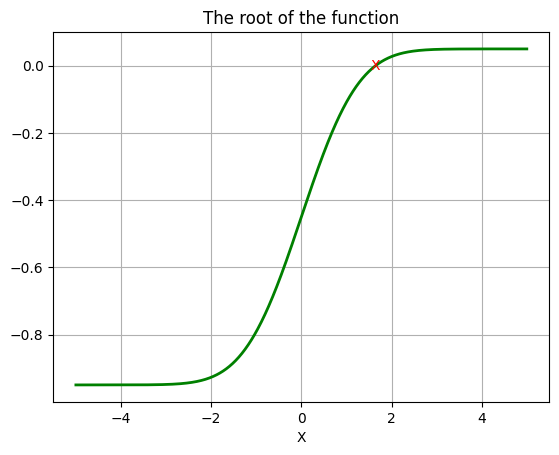

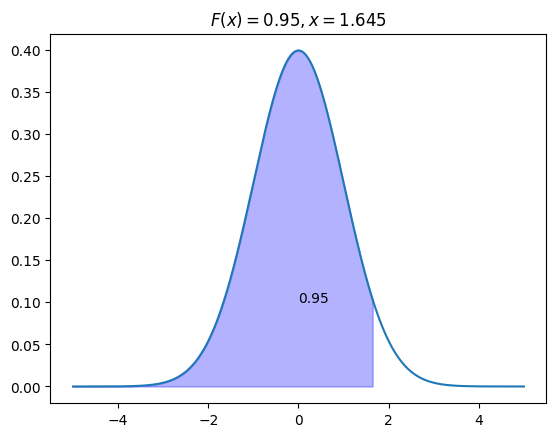

In [7]:
def f(x, prob) :
    g = lambda x : np.exp(-x**2/2) / np.sqrt(2*np.pi) #積分式子
    return integral.quad(g, -np.inf, x)[0] - prob #積分式子-0.95
 
# Draw function graph
prob = 0.95
# print(f(1.645, prob)) 
x = np.linspace(-5, 5, 1000)

#broadcasting寫法
# vec_f = np.vectorize(f)
# F = vec_f(x, prob)

# 迴圈寫法
y = np.zeros(len(x))
for i in range(len(x)) :
    y[i] = f(x[i], prob)

plt.plot(x, y, color = 'g', linewidth = 2)
#compute the root
sol = opt.root_scalar(f, bracket=[-5, 5], args=(prob), method='brentq')
print('The root is at x = {:.4f}'.format(sol.root))
#mark the root on top of function line
plt.text(sol.root, 0, 'X', color = 'r',
    horizontalalignment='center',
    verticalalignment='center')
plt.title('The root of the function')
plt.xlabel('X'), plt.grid(True)
plt.show()

# Draw the area in pdf 
y = norm.pdf(x)
plt.plot(x, y)
x_area = np.linspace(x.min(), sol.root, 100 )
y_area = norm.pdf(x_area)
plt.fill_between(x_area, y_area, 0, color = 'b', alpha = 0.3)
plt.text(0, 0.1, prob)
plt.title('$F(x)={:.2f}, x = {:.3f}$'.format(prob, sol.root))
plt.show()

結果：　<BR> 這樣的結果圖形清晰地展示了標準常態分布中累積機率為0.95的位置，同時標註出了計算得到的根 x = 1.6449。

## 練習：以數值方法計算較複雜函數的根

## 令 $\beta(x;a,b)$ 代表 $\beta$ 機率密度函數$（PDF)$，a, b 為分配參數，

## 求解 $\beta(x;2, 6) = \beta(x;4, 2)$。即求解 $f(x) =  \beta(x;2, 6) - \beta(x;4, 2) = 0$ 的解。

## 繪製函數圖 $f(x)$ 並標示答案的位置。

## 請注意：$\beta$ 機率密度函數（PDF) 可以直接採用 $scipy.beta.pdf(…)$

程式碼解釋
1. 定義了函數f(t)=t^2/2和其導數 f'(t)=t。
2. 使用 integrate.quad 計算 L(X)
3. 使用 optimize.root_scalar 找到 L(x)=10 的解 x。
3. 繪製 L(x) 的圖表，將根的位置標示為紅色點。
1. 圖表上方的綠色虛線表示 L(x)=10。

程式碼解釋：　<BR>這段程式碼的目標是繪製一個函數 f(x)，其中 f(x) 表示 beta 分布參數為 (2, 6) 的機率密度函數減去參數為 (4, 2) 的機率密度函數。然後使用 scipy.optimize.fsolve 函數找到 f(x) = 0 的解，並在圖中以紅色點標示出來。
1. def f(x): 函數：定義了 f(x) 為兩個 beta 分布機率密度函數之差。
2. x_values = np.linspace(0, 1, 1000)：在區間 [0, 1] 內生成 1000 個均勻分布的 x 值。
3. y_values = f(x_values)：計算對應於 x_values 的 f(x) 值。
4. plt.plot(x_values, y_values, label=r'$\beta(x;2,6) - \beta(x;4,2)$')：繪製函數 f(x) 的圖形。


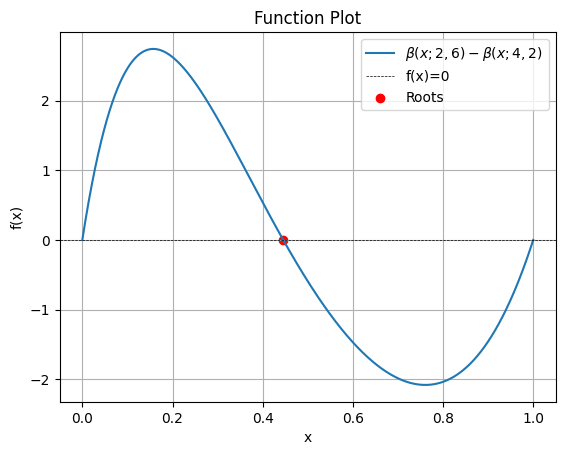

In [12]:

# 定義 \beta 函數
def f(x):
    return beta.pdf(x, 2, 6) - beta.pdf(x, 4, 2)

# 在範圍 [0, 1] 內生成 x 值
x_values = np.linspace(0, 1, 1000)

# 計算 f(x) 值
y_values = f(x_values)

# 繪製函數圖
plt.plot(x_values, y_values, label=r'$\beta(x;2,6) - \beta(x;4,2)$')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--', label='f(x)=0')

# 使用 fsolve 找到解
roots = fsolve(f, 0.5)
plt.scatter(roots, [0], color='red', label='Roots')

# 加上標籤和標題
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function Plot')
plt.legend()
plt.grid(True)
plt.show()


結果：　<BR> 當x約等於0.43時，這個多項式的值會等於零。

## 範例 4：以符號的方式計算函數的根（Symbolic root-finding）

## 利用符號運算套件 sympy 求解下列方程式，並以符號繪圖的方式繪製函數圖形。

## $f(x) = x^2-3x+2 = 0$
## $f(x) = x - e^{-x/2} = 0$


程式碼解釋：　<BR>這段程式碼使用 SymPy 來解一元二次方程式，然後繪製該方程式的圖形。
1. 使用 np.polyval 將係數 [1, -3, 2] 轉換為 SymPy 的多項式表示。
2. 使用 sym.solve 找出方程式的根，並將根轉換為浮點數列表。
3. 使用 plot 函數繪製方程式的圖形，同時在圖中標示出根的位置。
4. 使用 solveset 函數找出方程式的解集，並將解集轉換為浮點數列表。
5. 使用 sympy.pprint 函數印出方程式及簡化後的表達式。

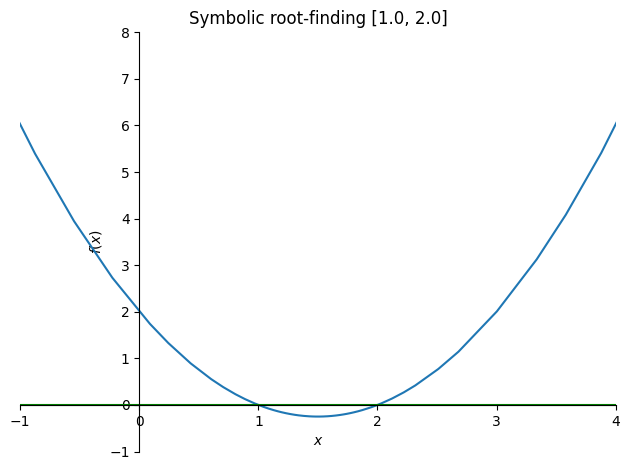

The roots are [1.0, 2.0]
x⋅(x - 3) + 2
sin(x)
──────
cos(x)
tan(x)


In [46]:

x = sym.Symbol('x')
coef = [1, -3, 2] # from high to low
f = np.polyval(coef, x)
# f = x**2 - 3*x + 2
r = sym.solve(f)
# convert r to float numbers
r_float = [float(x) for x in r]
 
fig1 = plot(f, xlim = [-1, 4], ylim = [-1, 8], \
    show = False, title = 'Symbolic root-finding {}'.format(r_float))
fig2 = plot(0*x, xlim = [-1, 4], line_color = 'g', show = False)
fig1.append(fig2[0])
fig1.show()
 
# Alternative: sympy claims that solveset will replace solve in the future
rset = sym.solveset(f, x, domain = sym.S.Reals) #sym.Interval(0, 1)
rset_float = [float(x) for x in rset] # convert to float
print('The roots are {}'.format(rset_float))
#-------------------------------------------
sym.pprint(f)
exp = sym.sin(x) / sym.cos(x)
sym.pprint(exp)
sym.pprint(sym.simplify(exp))
#--------------------------------------------

結果：　<BR> 這段程式碼展示了如何使用 SymPy 解一元二次方程式並繪製其圖形，同時印出方程式及簡化後的表達式。當x=1, 2時，這個多項式的值會等於零。

## 範例 5：數值最小值計算 Numerical minimization

## 計算函數 <BR> $f(x) = x^4 - 8x^3+16x^2-2x+8$ <BR> 的最小值。

程式碼解釋：　<BR>
1. 使用 np.polyval 將係數 [1, -8, 16, -2, 8] 轉換為一個多項式函數。
2. 使用 plt.plot 繪製多項式函數的圖形。
3. 使用 opt.minimize_scalar 找到多項式函數的局部最小值，並儲存結果在 res 中。
4. 印出找到的局部最小值的 x 座標和對應的函數值。
5. 使用 plt.text 在圖上標示出找到的局部最小值。



 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -0.06065979552750811
       x: 4.059791962084551
     nit: 10
    nfev: 13
The function has a local minimum at x = 4.0598
The corresponding function value is -0.0607


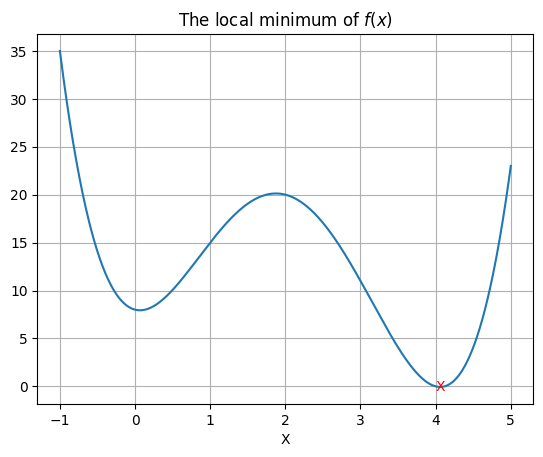

In [83]:

# draw the graph
coef = [1, -8, 16, -2, 8] # high to low
f= lambda x : np.polyval(coef, x)
x = np.linspace(-1, 5, 1000)
plt.plot(x, f(x))
plt.xlabel('X'), plt.grid(True)
 
# compute the local minimum
res = opt.minimize_scalar(f, bracket=[2, 3, 5])
print(res) # find out the return values
print('The function has a local minimum at x = {:.4f}'.format(res.x))
print('The corresponding function value is {:.4f}'.format(res.fun))
 
plt.text(res.x, res.fun, 'X', color = 'r',
    horizontalalignment='center',
    verticalalignment='center')
plt.title('The local minimum of $f(x)$')
plt.show()

結果：　<BR> 這段程式碼用於尋找多項式函數的局部最小值，並在圖形中標示出該最小值的位置。<BR>
The function has a local minimum at x = 4.0598<BR>
The corresponding function value is -0.0607

## 練習：數值最小值計算 Numerical minimization

## $\displaystyle \min_{x \in (0,3)} \tan^{-1}\frac{5}{x}+\tan^{-1}\frac{2}{3-x}$


程式碼解釋：　<BR>
1. 定義了一個函數 f(x)，該函數包含兩個反正切函數的和。
2. 使用 np.linspace 生成介於 0.1 到 2.9 之間的 x 值，並使用 plt.plot 繪製函數 f(x) 的圖形。
3. 使用 opt.minimize_scalar 在指定的範圍 [0.1, 2] 內尋找函數的局部最小值，並將結果存儲在 res 中。
4. 印出找到的局部最小值的 x 座標和對應的函數值。
5. 使用 plt.text 在圖上標示出找到的局部最小值。

 message: Solution found.
 success: True
  status: 0
     fun: 2.1458281171592906
       x: 0.5278640550908008
     nit: 10
    nfev: 10
The function has a local minimum at x = 0.5279
The corresponding function value is 2.1458


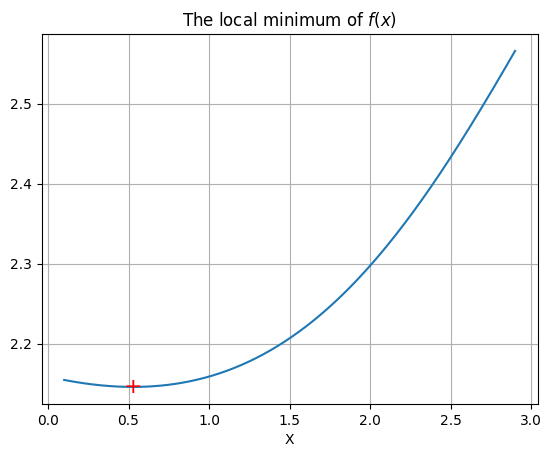

In [90]:

# draw the graph
# f= (np.tan)^(-1)*5/x + (np.tan)^(-1)(2/(3-x))
def f(x):
    a = np.arctan(5/x)
    b = np.arctan(2/(3-x))
    return a + b

x = np.linspace(0.1, 2.9, 1000)
plt.plot(x, f(x))
plt.xlabel('X'), plt.grid(True)
 
# compute the local minimum
res = opt.minimize_scalar(f, bounds=[0.1, 2], method='bounded')
print(res) # find out the return values
print('The function has a local minimum at x = {:.4f}'.format(res.x))
print('The corresponding function value is {:.4f}'.format(res.fun))
 
plt.text(res.x, res.fun, '+', color = 'r',fontsize=16,
    horizontalalignment='center',
    verticalalignment='center')
plt.title('The local minimum of $f(x)$')
plt.show()

結果：　<BR> 這段程式碼用於尋找函數的局部最小值，並在圖形中標示出該最小值的位置。<BR>
The function has a local minimum at x = 0.5279<BR>
The corresponding function value is 2.1458

## 範例 6：數值最大值計算 Numerical maximization

## 計算函數的區域最大值
 
## $\displaystyle \max_{0 \leq \theta \leq 3\pi} V(\theta),where V(\theta)=\frac{\pi}{3}(\frac{10\pi - 5\theta}{2\pi})^2\sqrt{25 - (\frac{10\pi - 5\theta}{2\pi})^2}$

程式碼解釋：　<BR>
1. 定義了一個複雜的函數 V(t)，該函數包含數學運算和函數的應用。
2. 使用 np.linspace 生成介於 0 到 3π 之間的 t 值，並使用 plt.plot 繪製函數 V(t) 的圖形。
3. 定義了一個匿名函數 f(x)，其值為 -V(x)，即原函數取負號。
4. 使用 opt.minimize_scalar 在指定的範圍 [0, 2] 內尋找負號函數的最小值，並將結果存儲在 res 中。
5. 使用 plt.text 在圖上標示出找到的最小值位置。
6. 顯示繪製好的圖形，並印出找到的最小值和其對應的 x 座標。

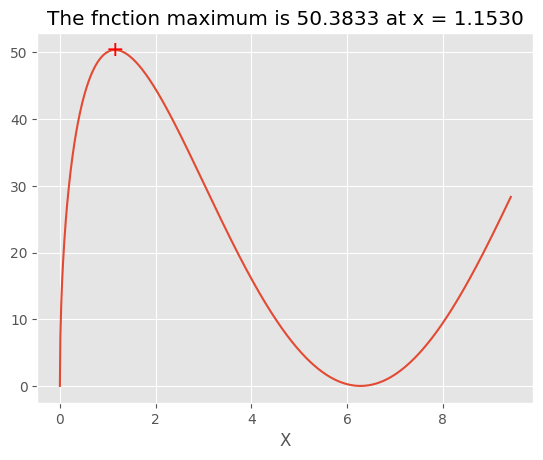

In [37]:

# First, draw function graph
# define a function for a complicated funcion
def V(t) :
    tmp = ((10*np.pi - 5*t) / (2*np.pi))**2
    V = np.pi / 3 * tmp * np.sqrt(25 - tmp)
    return V
 
t = np.linspace(0, 3*np.pi, 1000)
plt.plot(t, V(t))
 
f = lambda x : -V(x)
res = opt.minimize_scalar(f, bounds = [0, 2])
 
plt.text(res.x, -res.fun, '+', color ='r', fontsize = 16,
    horizontalalignment='center',
    verticalalignment='center')
plt.xlabel('X'), plt.grid(True)
plt.title('The fnction maximum is {:.4f} at x = {:.4f}'.format(-res.fun, res.x))
plt.show()

結果：<br>這段程式碼用於尋找函數在指定範圍內的最小值，並在圖形中標示出該最小值的位置。<br>
The fnction maximum is 50.3833 at x = 1.1530